My github link: https://github.com/yamincode/MovieLens/blob/main/MovieRecommenderSystem.ipynb


Kaggle Data Link :
https://www.kaggle.com/datasets/grouplens/movielens-20m-dataset/data?select=link.csv



The datasets describe ratings and free-text tagging activities from MovieLens, a movie recommendation service. 
It contains 20000263 ratings and 465564 tag applications across 27278 movies. 
These data were created by 138493 users between January 09, 1995 and March 31, 2015. This dataset was generated on October 17, 2016.

Users were selected at random for inclusion. All selected users had rated at least 20 movies.

Content

No demographic information is included. Each user is represented by an id, and no other information is provided.

The data are contained in six files.

tag.csv that contains tags applied to movies by users:

userId

movieId

tag

timestamp

rating.csv that contains ratings of movies by users:

userId

movieId

rating

timestamp

movie.csv that contains movie information:

movieId

title

genres

link.csv that contains identifiers that can be used to link to other sources:(we will not use this file)

movieId

imdbId

tmbdId

genome_scores.csv that contains movie-tag relevance data:

movieId

tagId

relevance

genome_tags.csv that contains tag descriptions:

tagId

tag

In [1]:

import pandas as pd
import numpy as np


# Load the data
ratings = pd.read_csv('archive/rating.csv')
movies = pd.read_csv('archive/movie.csv')
tags = pd.read_csv('archive/tag.csv')
genome_scores = pd.read_csv('archive/genome_scores.csv')
genome_tags = pd.read_csv('archive/genome_tags.csv')
#links = pd.read_csv('archive/link.csv')

# View the first few rows of the ratings dataset
ratings.head()


,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [2]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
#Let's create a movie detail dataset with rating and movie info
movie_details = movies.merge(ratings, how="left", on="movieId")
movie_details.drop(columns=['timestamp'],inplace=True)
movie_details.head()

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.0,4.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6.0,5.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8.0,4.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10.0,4.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11.0,4.5


In [4]:
# Check the shape and structure of each dataset
ratings.info()
movies.info()
tags.info()
genome_scores.info()
genome_tags.info()
movie_details.info()

# Descriptive statistics
ratings.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000263 entries, 0 to 20000262
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 610.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  27278 non-null  int64 
 1   title    27278 non-null  object
 2   genres   27278 non-null  object
dtypes: int64(1), object(2)
memory usage: 639.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465564 entries, 0 to 465563
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   userId     465564 non-null  int64 
 1   movieId    465564 non-null  int64 
 2   tag        465548 non-null  object
 3   timestamp  465564 

,userId,movieId,rating
count,2.000026e+07,2.000026e+07,2.000026e+07
mean,6.904587e+04,9.041567e+03,3.525529e+00
std,4.003863e+04,1.978948e+04,1.051989e+00
min,1.000000e+00,1.000000e+00,5.000000e-01
25%,3.439500e+04,9.020000e+02,3.000000e+00
50%,6.914100e+04,2.167000e+03,3.500000e+00
75%,1.036370e+05,4.770000e+03,4.000000e+00
max,1.384930e+05,1.312620e+05,5.000000e+00


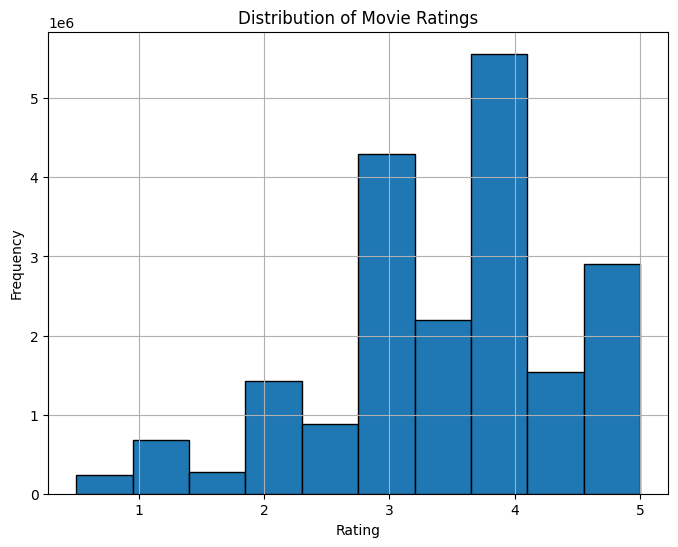

In [5]:
import matplotlib.pyplot as plt

# Plot the distribution of ratings
plt.figure(figsize=(8, 6))
ratings['rating'].hist(bins=10, edgecolor='black')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


In [6]:
# Group by movieId and calculate both the count of ratings and the average rating
movie_stats = movie_details.groupby('movieId').agg(rating_count=('rating', 'count'), average_rating=('rating', 'mean'))

# Sort the movies by their rating count in descending order
top_20_most_rated_movies = movie_stats.sort_values(by='rating_count', ascending=False).head(20)

# Join the top 20 movie IDs with the movie titles from the movies dataset
top_20_most_rated_movies_with_titles = top_20_most_rated_movies.reset_index().merge(movies[['movieId', 'title']], on='movieId')

# Print the result
print(top_20_most_rated_movies_with_titles[['title', 'rating_count', 'average_rating']])

# Now sort by average rating in descending order
top_20_sorted_by_avg_rating = top_20_most_rated_movies_with_titles.sort_values(by='average_rating', ascending=False)

# Print the result
print(top_20_sorted_by_avg_rating[['title', 'rating_count', 'average_rating']])


                                                title  rating_count  \
0                                 Pulp Fiction (1994)         67310   
1                                 Forrest Gump (1994)         66172   
2                    Shawshank Redemption, The (1994)         63366   
3                    Silence of the Lambs, The (1991)         63299   
4                                Jurassic Park (1993)         59715   
5           Star Wars: Episode IV - A New Hope (1977)         54502   
6                                   Braveheart (1995)         53769   
7                   Terminator 2: Judgment Day (1991)         52244   
8                                  Matrix, The (1999)         51334   
9                             Schindler's List (1993)         50054   
10                                   Toy Story (1995)         49695   
11                               Fugitive, The (1993)         49581   
12                                   Apollo 13 (1995)         47777   
13    

For above analysis, below Top 20 movies, we can always recommender them to new users as classic movies:


                                                title  rating_count  \
2                    Shawshank Redemption, The (1994)         63366   
14                         Usual Suspects, The (1995)         47006   
9                             Schindler's List (1993)         50054   
5           Star Wars: Episode IV - A New Hope (1977)         54502   
17  Star Wars: Episode V - The Empire Strikes Back...         45313   
8                                  Matrix, The (1999)         51334   
3                    Silence of the Lambs, The (1991)         63299   
0                                 Pulp Fiction (1994)         67310   
18                             American Beauty (1999)         44987   
6                                   Braveheart (1995)         53769   
1                                 Forrest Gump (1994)         66172   
15  Star Wars: Episode VI - Return of the Jedi (1983)         46839   
11                               Fugitive, The (1993)         49581   
7                   Terminator 2: Judgment Day (1991)         52244   
10                                   Toy Story (1995)         49695   
19          Twelve Monkeys (a.k.a. 12 Monkeys) (1995)         44980   
12                                   Apollo 13 (1995)         47777   
4                                Jurassic Park (1993)         59715   
16                                      Batman (1989)         46054   
13               Independence Day (a.k.a. ID4) (1996)         47048   

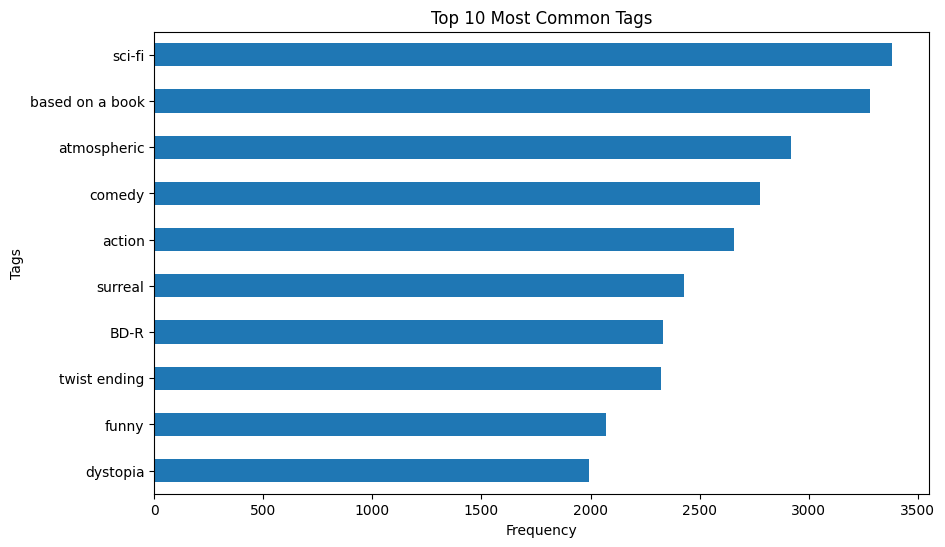

In [7]:
# Top 10 most common tags
tag_counts = tags['tag'].value_counts().head(10)

# Plot the most common tags
plt.figure(figsize=(10, 6))
tag_counts.plot(kind='barh')
plt.title('Top 10 Most Common Tags')
plt.xlabel('Frequency')
plt.ylabel('Tags')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
print(tag_counts)

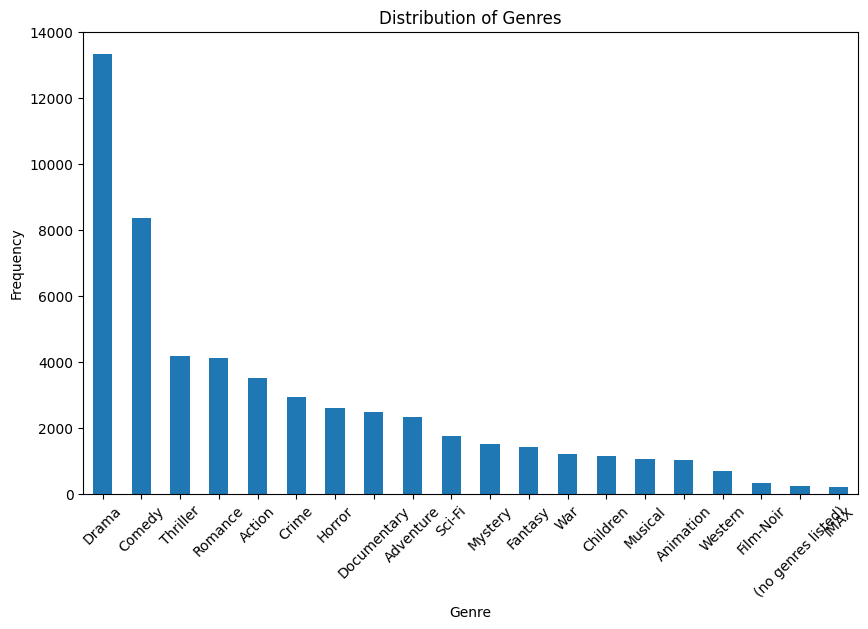

In [8]:
# Extract unique genres
movies['genres'] = movies['genres'].str.split('|')
all_genres = movies['genres'].explode().value_counts()

# Plot genre distribution
plt.figure(figsize=(10, 6))
all_genres.plot(kind='bar')
plt.title('Distribution of Genres')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


In [9]:
print(all_genres)

genres
Drama                 13344
Comedy                 8374
Thriller               4178
Romance                4127
Action                 3520
Crime                  2939
Horror                 2611
Documentary            2471
Adventure              2329
Sci-Fi                 1743
Mystery                1514
Fantasy                1412
War                    1194
Children               1139
Musical                1036
Animation              1027
Western                 676
Film-Noir               330
(no genres listed)      246
IMAX                    196
Name: count, dtype: int64


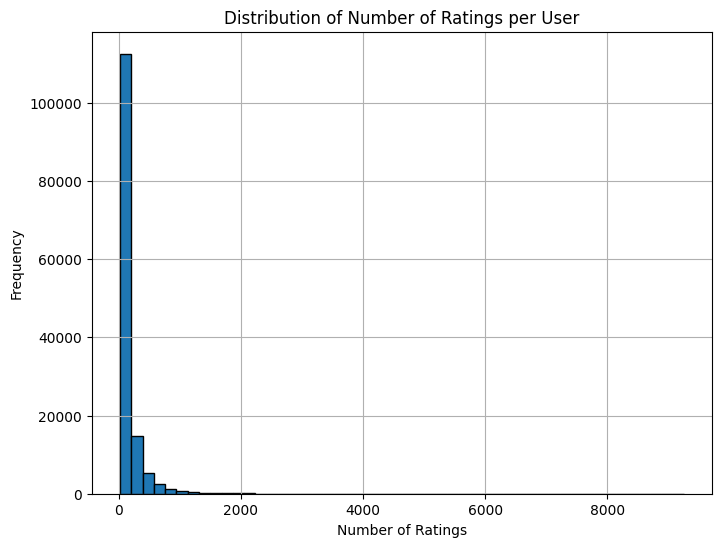

In [10]:
# Number of ratings per user
user_ratings_count = ratings.groupby('userId')['rating'].count()

# Plot the distribution of user activity
plt.figure(figsize=(8, 6))
user_ratings_count.hist(bins=50, edgecolor='black')
plt.title('Distribution of Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()


The majority of users have rated fewer than 100 movies.
There are a few very active users who have rated over 1,000 movies.

Insights:
Sparsity of Data: This distribution highlights the sparsity of the user-movie rating matrix. Most users interact with only a small fraction of the total movies, which may influence the performance of recommendation models.

Cold Start Problem: The large number of users with few ratings suggests the potential for a "cold start" problem, where it might be challenging to make recommendations for users with limited data.

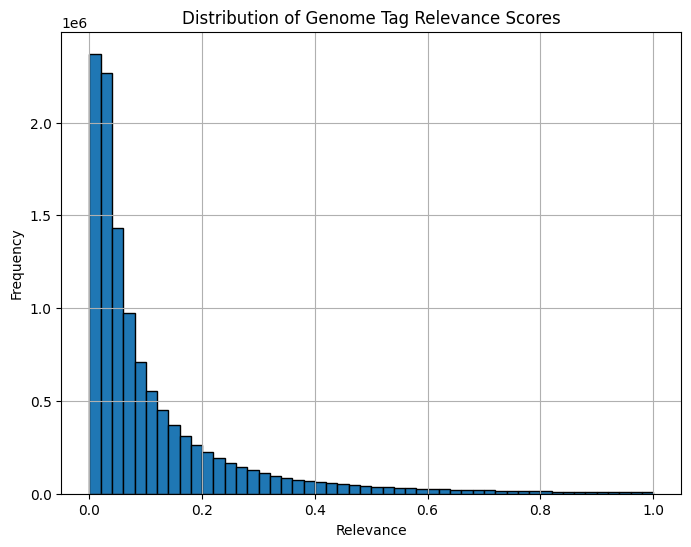

In [11]:
# Plot the distribution of relevance scores
plt.figure(figsize=(8, 6))
genome_scores['relevance'].hist(bins=50, edgecolor='black')
plt.title('Distribution of Genome Tag Relevance Scores')
plt.xlabel('Relevance')
plt.ylabel('Frequency')
plt.show()


Low Relevance Scores Dominating: Most tags have low relevance scores for the movies, meaning that while many tags exist, only a few of them are highly relevant to the majority of movies.

Long Tail: There's a long tail extending towards the higher relevance scores, indicating that some tags are highly relevant to certain movies.


Insights:
Tag Noise: Many tags might not be strongly associated with most movies, contributing to noise in the data.

Potential Thresholding: We might want to consider filtering out low-relevance tags when building the recommender system. For instance, tags with relevance scores below a certain threshold (e.g., 0.1) could be ignored to reduce the noise.

Feature Engineering: We can use these relevance scores to create movie profiles by focusing on highly relevant tags, which could improve the performance of content-based recommendation models.

Key Insights:


Top 10 Movies:
0                          Pulp Fiction (1994)
1                          Forrest Gump (1994)
2             Shawshank Redemption, The (1994)
3             Silence of the Lambs, The (1991)
4                         Jurassic Park (1993)
5    Star Wars: Episode IV - A New Hope (1977)
6                            Braveheart (1995)
7            Terminator 2: Judgment Day (1991)
8                           Matrix, The (1999)
9                      Schindler's List (1993)


Top 10 Tags:
sci-fi             3384
based on a book    3281
atmospheric        2917
comedy             2779
action             2657
surreal            2427
BD-R               2334
twist ending       2323
funny              2072
dystopia           1991

Top Genres:
Drama                 13344
Comedy                 8374
Thriller               4178
Romance                4127
Action                 3520
Crime                  2939
Horror                 2611
Documentary            2471
Adventure              2329
Sci-Fi                 1743
Mystery                1514
Fantasy                1412
War                    1194
Children               1139
Musical                1036
Animation              1027
Western                 676
Film-Noir               330
(no genres listed)      246
IMAX                    196

Data Cleaning

In [12]:
#Handle missing data 
print(movie_details.isnull().sum())
print(tags.isnull().sum())

# Check if there are any non-string or missing values in the genres column
print(movie_details['genres'].isnull().sum())  # Check for missing values
print(movie_details['genres'].apply(lambda x: isinstance(x, str)).sum())  # Count the number of string values

movieId      0
title        0
genres       0
userId     534
rating     534
dtype: int64
userId        0
movieId       0
tag          16
timestamp     0
dtype: int64
0
20000797


In [ ]:
# Replace null tags with a placeholder
tags_filled = tags.fillna({'tag': 'missing_tag'})

# Verify the replacement
print(tags_filled.isnull().sum())


In [13]:
#check for duplicate
movie_details.duplicated().sum()
tags.duplicated().sum()


0

What is a Recommender System?
A recommender system (or recommendation system) is an algorithm designed to suggest relevant items (e.g., movies, products, articles) to users based on their preferences or past behavior. Recommender systems are widely used in platforms like Netflix (movie recommendations), Amazon (product recommendations), and Spotify (music recommendations).

Types of Recommender Systems:
Content-Based Filtering:

Recommends items similar to those that the user has liked or interacted with before.
Based on the content of the items (e.g., genres, tags, descriptions).
For example, in movie recommendations, if a user likes "The Matrix," the system will recommend other sci-fi or action movies based on movie metadata (like genre or plot).


Collaborative Filtering:

Recommends items based on the preferences of similar users or items.
User-based: Recommends items that users similar to you liked.
Item-based: Recommends items similar to items you liked.
For example, if users A and B both liked "Inception," and user B also liked "The Dark Knight," the system would recommend "The Dark Knight" to user A.


Hybrid Systems:

Combines both content-based and collaborative filtering techniques to leverage the strengths of both.
Can address cold-start issues (where a user or item has little interaction history) by using content features.

Content-Based Filtering:

In [14]:
#Let's start with Content-Based Filtering:
#We will use the genome_scores.csv to create a movie-tag matrix where each row corresponds to a movie,
#and each column represents a tag’s relevance score for that movie.
#We have relevance score in our genome_scores.csv, we don't need to use TF-IDF to preprocess it
from sklearn.metrics.pairwise import cosine_similarity

merged_tags = genome_scores.merge(genome_tags, on='tagId', how='left')
# Create a pivot table where rows are movieId and columns are tag names, values are the relevance scores
movie_tag_matrix = merged_tags.pivot_table(index='movieId', columns='tag', values='relevance', fill_value=0)

# Calculate cosine similarity between movies based on tag relevance
cosine_sim_tags = cosine_similarity(movie_tag_matrix)

# Check the shape of the similarity matrix
print(cosine_sim_tags.shape)

def recommend_movies_based_on_tags(movie_title, movies, cosine_sim, num_recommendations=5):
    # Get the index of the movie that matches the title
    idx = movies[movies['title'] == movie_title].index[0]
    
    # Get the pairwise similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get the scores of the most similar movies
    sim_scores = sim_scores[1:num_recommendations+1]  # Exclude the first one (itself)
    
    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]
    
    # Return the top most similar movies
    return movies['title'].iloc[movie_indices]

# Example: Recommend movies similar to "Toy Story (1995)" based on tags
recommended_movies = recommend_movies_based_on_tags("Toy Story (1995)", movies, cosine_sim_tags)
print(recommended_movies)



(10381, 10381)
4331                                Kiss Me Deadly (1955)
2769                                    Nightmares (1983)
2064                                         House (1986)
5445    Nightmare City (a.k.a. City of the Walking Dea...
9070                        Cyborg 2: Glass Shadow (1993)
Name: title, dtype: object


In [15]:
#Here I will try to use genres as feature to do content-based filtering
#Join the encoded genres with the original movie data
# One-hot encoding for genres
genres_df = movies['genres'].str.join('|').str.get_dummies()

from sklearn.metrics.pairwise import cosine_similarity

# Calculate cosine similarity between movies based on their genres
cosine_sim = cosine_similarity(genres_df)

# Check the shape of the similarity matrix
print(cosine_sim.shape)

(27278, 27278)


In [18]:
movies_with_genres = movies.join(genres_df)

# Function to recommend movies based on content similarity
def recommend_movies_based_on_content(movie_title, movies, cosine_sim, num_recommendations=10):
    # Get the index of the movie that matches the title
    idx = movies[movies['title'] == movie_title].index[0]
    
    # Get the pairwise similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get the scores of the most similar movies
    sim_scores = sim_scores[1:num_recommendations+1]  # Exclude the first one (itself)
    
    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]
    
    # Return the top most similar movies
    return movies['title'].iloc[movie_indices]

# Example: Recommend movies similar to "Toy Story (1995)"
recommended_movies = recommend_movies_based_on_content("Toy Story (1995)", movies_with_genres, cosine_sim)
print(recommended_movies)


2209                                           Antz (1998)
3027                                    Toy Story 2 (1999)
3663        Adventures of Rocky and Bullwinkle, The (2000)
3922                      Emperor's New Groove, The (2000)
4790                                 Monsters, Inc. (2001)
10114    DuckTales: The Movie - Treasure of the Lost La...
10987                                     Wild, The (2006)
11871                               Shrek the Third (2007)
13337                       Tale of Despereaux, The (2008)
18274    Asterix and the Vikings (Astérix et les Viking...
Name: title, dtype: object


All of these movies share multiple genres with Toy Story (1995),
specifically Adventure, Animation, Children, Comedy, and Fantasy.
Since our content-based system is based on genre similarity, it is recommending movies with highly overlapping genres.


In [19]:
#Tuning
#We will try using TF-IDF to see if results different
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Assuming 'genres' column contains genres separated by '|'
movies_with_genres['genres_str'] = movies_with_genres['genres'].apply(lambda x: ' '.join(x))

# Apply TF-IDF to the genres
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(movies_with_genres['genres_str'])

# Calculate cosine similarity based on TF-IDF features
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Function to recommend movies based on content similarity (using TF-IDF)
def recommend_movies_based_on_content_genres(movie_title, movies, cosine_sim, num_recommendations=10):
    # Get the index of the movie that matches the title
    idx = movies[movies['title'] == movie_title].index[0]
    
    # Get the pairwise similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get the scores of the most similar movies
    sim_scores = sim_scores[1:num_recommendations+1]  # Exclude the first one (itself)
    
    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]
    
    # Return the top most similar movies
    return movies['title'].iloc[movie_indices]

# Example: Recommend movies similar to "Toy Story (1995)"
recommended_movies = recommend_movies_based_on_content_genres("Toy Story (1995)", movies_with_genres, cosine_sim)
print(recommended_movies)


2209                                           Antz (1998)
3027                                    Toy Story 2 (1999)
3663        Adventures of Rocky and Bullwinkle, The (2000)
3922                      Emperor's New Groove, The (2000)
4790                                 Monsters, Inc. (2001)
10114    DuckTales: The Movie - Treasure of the Lost La...
10987                                     Wild, The (2006)
11871                               Shrek the Third (2007)
13337                       Tale of Despereaux, The (2008)
18274    Asterix and the Vikings (Astérix et les Viking...
Name: title, dtype: object


In [ ]:
From above two results, I don't see much difference here.
Next, I will try to use Collaborative Filtering.
Since the dataset is pretty large, the notebook cannot handle it. I will reduce the dataset.

In [20]:
# we want to do reduce some data because the rating dataset is too big, and there are lots of sparse data.
# Step 1: Filter dataset for ratings greater than 20
filtered_movie_details = movie_details[movie_details['rating'] > 0]

# Step 2: Group by movieId and count the number of unique userId for each movie
unique_user_counts = filtered_movie_details.groupby('movieId')['userId'].nunique()

# Step 3: Filter for movies with at least 20 unique users
popular_movies = unique_user_counts[unique_user_counts >= 50].index

# Step 4: Filter the movie_details DataFrame to only include popular movies
filtered_movie_details = filtered_movie_details[filtered_movie_details['movieId'].isin(popular_movies)]

# Step 5: Filter for users who have rated more than 100 movies
user_rating_counts = filtered_movie_details['userId'].value_counts()
active_users = user_rating_counts[user_rating_counts > 500].index

# Step 6: Filter the movie_details DataFrame to only include active users
filtered_movie_details = filtered_movie_details[filtered_movie_details['userId'].isin(active_users)]

# Print the shape of the filtered dataset
print(filtered_movie_details.shape)



(6409957, 5)


In [21]:
# Create the user-movie interaction matrix (dense matrix)
user_movie_matrix = filtered_movie_details.pivot_table(index='userId', columns='movieId', values='rating', fill_value=0)

# Preview the matrix
print(user_movie_matrix.head())
print(user_movie_matrix.shape)  # Check the dimensions


movieId  1       2       3       4       5       6       7       8       \
userId                                                                    
24.0        4.0     0.0     0.0     0.0     2.0     4.0     3.0     0.0   
54.0        4.0     3.0     0.0     0.0     3.0     3.0     0.0     0.0   
58.0        5.0     0.0     0.0     0.0     0.0     4.5     0.0     0.0   
91.0        4.0     3.5     3.0     0.0     0.0     0.0     2.5     0.0   
104.0       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

movieId  9       10      ...  118700  118702  118900  118985  118997  119141  \
userId                   ...                                                   
24.0        0.0     3.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
54.0        0.0     4.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
58.0        0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
91.0        0.0     4.0  ...     0.0     0.0     0.0     0.0     0.0     0

In [ ]:
pip install scikit-surprise


Using the Surprise library to build a collaborative filtering recommender system based on matrix factorization, 
specifically SVD (Singular Value Decomposition).

1. Surprise Library:
Surprise is a Python library used for building recommender systems, particularly collaborative filtering models. It provides efficient implementations for various algorithms like SVD, KNN, and baseline models.
It also includes utilities for loading datasets, splitting data for training and testing, and evaluating model performance (e.g., calculating RMSE).

2.SVD (Singular Value Decomposition) is a matrix factorization technique used to reduce the dimensionality of the user-item interaction matrix (ratings matrix). The main goal of SVD in collaborative filtering is to discover hidden (latent) features in users and items.
SVD decomposes the user-item matrix into three matrices:
U (User Matrix): Represents latent features of users.
Σ (Singular Values): Represents the importance of latent features.
Vᵀ (Item Matrix): Represents latent features of items.


In [22]:
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import SVD  # This uses matrix factorization (ALS-like)

# Prepare the data in the format for surprise
reader = Reader(rating_scale=(0.5, 5.0))  # Assuming ratings are on a 0.5 to 5 scale
data = Dataset.load_from_df(filtered_movie_details[['userId', 'movieId', 'rating']], reader)

# Split the data into training and test sets
trainset, testset = train_test_split(data, test_size=0.2)


In [23]:
# Train the SVD model
svd_model = SVD(n_factors=50, reg_all=0.1, n_epochs=20)
svd_model.fit(trainset)


In [24]:
# Recommend top 5 movies for user with userId 1
user_id = 1

# Get a list of all movieIds
all_movie_ids = filtered_movie_details['movieId'].unique()

# Recommend top N movies that the user hasn't rated yet
def recommend_movies_surprise(user_id, svd_model, all_movie_ids, num_recommendations=5):
    # Predict ratings for all movies the user hasn't rated
    user_rated_movie_ids = filtered_movie_details[filtered_movie_details['userId'] == user_id]['movieId']
    unrated_movie_ids = [movie_id for movie_id in all_movie_ids if movie_id not in user_rated_movie_ids.values]
    
    # Predict ratings for each unrated movie
    predicted_ratings = [(movie_id, svd_model.predict(user_id, movie_id).est) for movie_id in unrated_movie_ids]
    
    # Sort by predicted rating and return top recommendations
    recommended_movies = sorted(predicted_ratings, key=lambda x: x[1], reverse=True)[:num_recommendations]
    
    return recommended_movies

# Get recommendations for the user
recommended_movies = recommend_movies_surprise(user_id, svd_model, all_movie_ids, num_recommendations=5)
# Extract the movieIds from the recommendations
recommended_movie_ids = [rec[0] for rec in recommended_movies]

# Convert the recommended movieIds to a DataFrame
recommended_movies_df = pd.DataFrame(recommended_movie_ids, columns=['movieId'])

# Merge with the original movies DataFrame to get titles
recommended_movies_with_titles = recommended_movies_df.merge(movies[['movieId', 'title']], on='movieId', how='left')

# Print the recommendations with titles
print(recommended_movies_with_titles)
print(f"Recommended movies for user {user_id}: {recommended_movies}")



   movieId                                              title
0    26073  Human Condition III, The (Ningen no joken III)...
1     7502                            Band of Brothers (2001)
2      318                   Shawshank Redemption, The (1994)
3      858                              Godfather, The (1972)
4     1198  Raiders of the Lost Ark (Indiana Jones and the...
Recommended movies for user 1: [(26073, 4.316106639563521), (7502, 4.256347384924242), (318, 4.227123464076628), (858, 4.206622375000902), (1198, 4.169272805350708)]


In [35]:
#Let's try Hyper-parameter tuning for SVD model
from surprise import SVD, Dataset, Reader
from surprise.model_selection import GridSearchCV, train_test_split,RandomizedSearchCV

# Load data into Surprise's format
reader = Reader(rating_scale=(0.5, 5.0))

# Sample the data (e.g., take 10% of the full dataset)
sampled_movie_details = filtered_movie_details.sample(frac=0.1, random_state=42)  # Adjust frac as needed

# Convert sampled data to Surprise format
data_sampled = Dataset.load_from_df(sampled_movie_details[['userId', 'movieId', 'rating']], reader)

# Build the trainset from the sampled data
trainset_sampled = data_sampled.build_full_trainset()

# Define parameter grid for fine-tuning SVD
param_grid = {
    'n_factors': [10, 20, 50],
    'n_epochs': [5, 10, 20],
    'lr_all': [0.002, 0.005],
    'reg_all': [0.02, 0.1]
}

# Perform random search cross-validation on the sampled dataset
random_search = RandomizedSearchCV(SVD, param_grid, measures=['rmse'], cv=3, n_jobs=-1, n_iter=10, random_state=42)
random_search.fit(data_sampled)  # Use the sampled data for fitting

# Get the best parameters and RMSE from the sampled data
best_params = random_search.best_params['rmse']
best_rmse = random_search.best_score['rmse']
print(f"Best parameters from sampled data: {best_params}, Best RMSE: {best_rmse}")



Best parameters from sampled data: {'n_factors': 10, 'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.1}, Best RMSE: 0.8339323067843548


In [36]:
# Best parameters from sampled data: {'n_factors': 10, 'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.1}, Best RMSE: 0.8339323067843548
# Apply the best parameters to the full dataset
data_full = Dataset.load_from_df(filtered_movie_details[['userId', 'movieId', 'rating']], reader)
# Split the data into training and test sets
trainset_full, testset_full = train_test_split(data_full, test_size=0.2)

# Train the model with the best parameters on the full dataset
best_svd_model = SVD(n_factors=best_params['n_factors'], 
                     n_epochs=best_params['n_epochs'], 
                     lr_all=best_params['lr_all'], 
                     reg_all=best_params['reg_all'])

# Now fit the model on the full trainset
best_svd_model.fit(trainset_full)


In [37]:
# Use best svd model to get recommendations for the user
recommended_movies = recommend_movies_surprise(user_id, best_svd_model, all_movie_ids, num_recommendations=5)
# Extract the movieIds from the recommendations
recommended_movie_ids = [rec[0] for rec in recommended_movies]

# Convert the recommended movieIds to a DataFrame
recommended_movies_df = pd.DataFrame(recommended_movie_ids, columns=['movieId'])

# Merge with the original movies DataFrame to get titles
recommended_movies_with_titles = recommended_movies_df.merge(movies[['movieId', 'title']], on='movieId', how='left')

# Print the recommendations with titles
print(recommended_movies_with_titles)
print(f"Recommended movies for user {user_id}: {recommended_movies}")


   movieId                                              title
0     7502                            Band of Brothers (2001)
1    26073  Human Condition III, The (Ningen no joken III)...
2   108583                          Fawlty Towers (1975-1979)
3      858                              Godfather, The (1972)
4    77658                                      Cosmos (1980)
Recommended movies for user 24.0: [(7502, 4.280412651385093), (26073, 4.270267827326036), (108583, 4.232223806797291), (858, 4.223468169777139), (77658, 4.176579778932326)]


In [29]:
#using model we build in Week 3 for collaborate filtering
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics import jaccard_score
from scipy.sparse import csr_matrix
from sklearn.metrics import pairwise_distances
class RecSys():
    def __init__(self,data):

        self.data = data

        # Extract unique users and movies from filtered_movie_details
        self.allusers = list(self.data['filtered_movie_details']['userId'].unique())
        self.allmovies = list(self.data['filtered_movie_details']['movieId'].unique())

        # Extract genres from movies_with_genres
        self.genres = list(self.data['movies_with_genres'].columns.drop(['movieId', 'title']))

        # Map movieId and userId to index
        self.mid2idx = dict(zip(self.allmovies, list(range(len(self.allmovies)))))
        self.idx2mid = {v: k for k, v in self.mid2idx.items()} 
        self.uid2idx = dict(zip(self.allusers, list(range(len(self.allusers)))))

        # Initialize rating matrix (user-movie interaction matrix)
        self.Mr = self.rating_matrix()

        # Movie feature matrix for genres (to be filled later)
        self.Mm = None 

        # Similarity matrix for movies (initialized to zeros)
        self.sim = np.zeros((len(self.allmovies), len(self.allmovies)))
 
    def rating_matrix(self):
        """
        Convert the rating matrix to numpy array of shape (#allusers,#allmovies)
        """
        # Create an empty matrix for user-movie interactions
        n_users = len(self.allusers)
        n_movies = len(self.allmovies)
        rating_matrix = np.zeros((n_users, n_movies))

        # Fill the matrix with the ratings from filtered_movie_details
        for _, row in self.data['filtered_movie_details'].iterrows():
            user_idx = self.uid2idx[row['userId']]
            movie_idx = self.mid2idx[row['movieId']]
            rating_matrix[user_idx, movie_idx] = row['rating']

        return rating_matrix

    def predict_from_sim(self, uid, mid):
        """
        Predict a user rating on a movie given userID and movieID
        """
        # Get user and movie indices
        user_idx = self.uid2idx[row['userId']]
        movie_idx = self.mid2idx[row['movieId']]

        # Get user's rating vector
        user_ratings = self.Mr[user_idx, :]
        
        # Get movie similarity vector for the given movie
        movie_similarities = np.copy(self.sim[movie_idx, :]).flatten()
        movie_similarities[movie_idx] = 0  # Set self-similarity to zero

        # Only consider movies the user has rated
        rated_movie_indices = user_ratings > 0
        if np.sum(rated_movie_indices) == 0:
            return np.nan  # If no rated movies, return NaN

        # Compute weighted sum of user ratings and movie similarities
        weighted_sum = np.dot(user_ratings[rated_movie_indices], movie_similarities[rated_movie_indices])
        similarity_sum = np.sum(movie_similarities[rated_movie_indices])

        if similarity_sum == 0:
            return np.nan  # Return NaN if no similarities

        return weighted_sum / similarity_sum

    def predict(self):
        """
        Predict ratings in the test data. Returns predicted rating in a numpy array.
        """
        predictions = []
        for uid, mid in zip(self.data['filtered_movie_details']['userId'], self.data['filtered_movie_details']['movieId']):
            predictions.append(self.predict_from_sim(uid, mid))

        return np.array(predictions)
   
                
class Collaborative(RecSys):    
    def __init__(self,data):
        super().__init__(data)
        self.data=data
        
    def calc_item_item_similarity(self, simfunction, *X):  
        """
        Create item-item similarity using similarity function. 
        X is an optional transformed matrix of Mr
        """    
        # General function that calculates item-item similarity based on the sim function and data inputed
        if len(X)==0:
            self.sim = simfunction()            
        else:
            self.sim = simfunction(X[0]) # *X passes in a tuple format of (X,), to X[0] will be the actual transformed matrix
            
    def cossim(self):
        # Ensure the ratings matrix is of type float
        X = self.Mr.astype(np.float64).copy()  # Use float to avoid type issues

        # Step 1: Compute user means (ignoring zero ratings)
        user_means = np.zeros(X.shape[0])
        for i in range(X.shape[0]):
            non_zero_ratings = X[i][X[i] > 0]  # Only consider rated items
            if len(non_zero_ratings) > 0:
                user_means[i] = np.mean(non_zero_ratings)  # Compute mean ignoring zeros

        # Impute unrated entries (0s) with user means
        for i in range(X.shape[0]):
            X[i, X[i] == 0] = user_means[i]  # Replace unrated items with user mean
            X[i, X[i] > 0] -= user_means[i]  # Subtract the user mean to mean-center

        # Transpose X for item-item similarity
        X = X.T  # Now X is (items x users), allowing item-item comparison

        # Step 2: Calculate norms for cosine similarity
        norms = np.linalg.norm(X, axis=1)
        norms[norms == 0] = 1e-10  # Avoid division by zero by adding small constant

        # Step 3: Calculate cosine similarity
        cosine_similarity = np.dot(X, X.T) / np.outer(norms, norms)

        # Set self-similarity to 1 for all items
        np.fill_diagonal(cosine_similarity, 1)

        # Handle NaN values (arising from division by zero)
        cosine_similarity = np.nan_to_num(cosine_similarity)

        # Rescale the cosine similarity to [0, 1]
        cosine_similarity = (cosine_similarity + 1) / 2

        # Store the similarity matrix
        self.sim = cosine_similarity

        return self.sim


    def recommend_movies(self, user_id, top_n=5):
        """
        Recommend movies for a user based on collaborative filtering.
        """
        user_idx = self.uid2idx[user_id]
        user_ratings = self.Mr[user_idx, :]

        # Find movies the user hasn't rated yet
        unrated_movie_indices = np.where(user_ratings == 0)[0]

        # Predict similarity scores for unrated movies
        movie_scores = []
        for idx in unrated_movie_indices:
            sim_scores = self.sim[idx]
            score = np.dot(sim_scores, user_ratings) / np.sum(sim_scores[user_ratings > 0])
            movie_scores.append((idx, score))

        # Sort by predicted score and select top N
        top_movies = sorted(movie_scores, key=lambda x: x[1], reverse=True)[:top_n]

        # Return the movie titles for the top recommended movies
        top_movie_ids = [self.idx2mid[idx] for idx, _ in top_movies]
        return self.data['movies_with_genres'][self.data['movies_with_genres']['movieId'].isin(top_movie_ids)][['movieId', 'title']]


In [30]:
# Prepare data
data = {
    'filtered_movie_details': filtered_movie_details,
    'movies_with_genres': movies_with_genres
}

# Collaborative recommendation
collaborative_recsys = Collaborative(data)
collaborative_recsys.calc_item_item_similarity(collaborative_recsys.cossim)

In [31]:

# Recommend top 5 movies for a specific user (e.g., userId 24.0)
recommended_movies = collaborative_recsys.recommend_movies(user_id=24.0, top_n=5)

# Print the recommended movies
print(recommended_movies)

      movieId                                              title
523       527                            Schindler's List (1993)
843       858                              Godfather, The (1972)
1169     1193             One Flew Over the Cuckoo's Nest (1975)
1173     1198  Raiders of the Lost Ark (Indiana Jones and the...
1195     1221                     Godfather: Part II, The (1974)


In [32]:
user_id = 24.0  # The user ID we want to check

# Filter the ratings for the specified user
user_ratings = filtered_movie_details[filtered_movie_details['userId'] == user_id]

# Select and display relevant columns (movie title and rating)
rated_movies = user_ratings[['movieId', 'title', 'rating','genres']]
print(rated_movies)

          movieId                                           title  rating  \
12              1                                Toy Story (1995)     4.0   
87430           5              Father of the Bride Part II (1995)     2.0   
99598           6                                     Heat (1995)     4.0   
123494          7                                  Sabrina (1995)     3.0   
141830         10                                GoldenEye (1995)     3.0   
...           ...                                             ...     ...   
15965808     5803                                    I Spy (2002)     3.0   
15968847     5810                                   8 Mile (2002)     3.0   
15976282     5816  Harry Potter and the Chamber of Secrets (2002)     2.0   
16045444     5943                        Maid in Manhattan (2002)     3.0   
16240386     6213                         Tears of the Sun (2003)     4.0   

                                               genres  
12        Adventure

In [42]:
import pandas as pd

# Assuming movie_details is your DataFrame

# Step 1: Split the genres column into multiple rows
movies_copy= movie_details.copy()
movies_copy['genres'] = movies_copy['genres'].str.split('|')
movies_exploded = movies_copy.explode('genres')

# Step 2: Drop duplicate entries to avoid counting the same movie multiple times
movies_exploded_unique = movies_exploded.drop_duplicates(subset=['movieId', 'userId'])

# Step 3: Count the number of ratings for each movie
rating_counts = movies_exploded_unique.groupby('movieId')['rating'].count().reset_index()
rating_counts.columns = ['movieId', 'num_ratings']

# Merge the number of ratings back to the exploded movies_with_genres DataFrame
movies_with_genres_ratings = pd.merge(movies_exploded_unique, rating_counts, on='movieId')

# Step 4: Define a function to get the top 20 movies with the most ratings for each genre
def get_top_movies_for_genre(genre, top_n=20):
    genre_movies = movies_with_genres_ratings[movies_with_genres_ratings['genres'] == genre]
    top_movies = genre_movies.sort_values(by='num_ratings', ascending=False).drop_duplicates(subset='movieId').head(top_n)
    return top_movies[['movieId', 'title', 'num_ratings']]

# Step 5: Get the unique genres
unique_genres = movies_with_genres_ratings['genres'].unique()

# Step 6: Generate top 20 movies for each genre with the most ratings
top_movies_by_genre = {}
for genre in unique_genres:
    top_movies_by_genre[genre] = get_top_movies_for_genre(genre)

# Example: Print the top 20 Action movies by number of ratings
print("Top 20 Action movies by number of ratings:")
print(top_movies_by_genre['Action'])




Top 20 Action movies by number of ratings:
          movieId                                              title  \
3207320       480                               Jurassic Park (1993)   
1709844       260          Star Wars: Episode IV - A New Hope (1977)   
865858        110                                  Braveheart (1995)   
3870497       589                  Terminator 2: Judgment Day (1991)   
11024463     2571                                 Matrix, The (1999)   
4661253       780               Independence Day (a.k.a. ID4) (1996)   
6432870      1210  Star Wars: Episode VI - Return of the Jedi (1983)   
3994562       592                                      Batman (1989)   
6173842      1196  Star Wars: Episode V - The Empire Strikes Back...   
6215031      1198  Raiders of the Lost Ark (Indiana Jones and the...   
2763368       380                                   True Lies (1994)   
2726846       377                                       Speed (1994)   
12160302     2959    

In this project, we developed a comprehensive recommender system using three key approaches:  Content-based filtering using genres and tags , SVD-based collaborative filtering, and  a custom-built Collaborative filtering RecSys. Each method offers its strengths and challenges, and we leveraged them to optimize the recommendation process for personalized movie suggestions.

Content-based:

Strengths:
Cold start friendly: Content-based filtering does not rely on user interactions, making it effective for recommending new items or when user data is limited.
Provides explainable recommendations: Users can understand why certain movies are recommended based on the similarities in genres or tags.

Challenges:
Narrow focus: Content-based filtering tends to recommend similar items and may not introduce much variety (i.e., it may overfit to specific genres or tags).
It doesn’t leverage broader user behavior, which can limit its ability to provide diverse recommendations.


SVD:

Strengths:
SVD effectively handles sparse data (typical in large-scale datasets like Movielens).
It captures latent factors representing user preferences and movie features, providing personalized recommendations based on underlying patterns in the data.

Challenges:
The model can be computationally expensive to fine-tune and train on large datasets.
It requires sufficient interaction data to function well, facing issues in cold start scenarios (new users or items).


custom-built Collaborative filtering RecSys from Week 3:

Strengths:
Collaborative filtering performs well in recommending movies based on user behavior and past interactions.
It adapts to changing preferences as new ratings are added, allowing for a dynamic recommendation system.

Challenges:
Cold start problem: Without historical interactions, the model struggles to recommend relevant content to new users or for new movies.
While collaborative filtering finds patterns in large datasets, it can overlook content-based similarities, especially when user behavior is sparse.

